### imports

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Visualize store visits

## 2.a Using a tool of your choice, visualize the trend of unique visits for all places

In [2]:
# open final_df
final_df = pd.read_csv("../out_data_full/analysis.csv")

In [3]:
final_df.head()

,date,store_name,store_id,total_signals,unique_visits,addidas,apple,bmw,employed,female,...,high_income,honda,job_seeking,low_income,male,mercedes-benz,middle_income,retired,student,tommy_helfinger
0,2021-01-01,Aldi,place_135,2,1,0,0,0,0,0,...,0,1,0,0,1,1,1,0,0,0
1,2021-01-01,Aldi,place_64,5,3,0,0,0,0,0,...,0,1,0,2,3,0,1,0,0,0
2,2021-01-01,Aldi,place_72,5,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,2021-01-01,Aldi,place_79,10,2,0,0,0,0,0,...,0,0,0,0,2,0,2,0,0,0
4,2021-01-01,Aldi,place_84,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [4]:
# transform column "date" into datetime object
final_df["date"] = pd.to_datetime(final_df["date"])

In [5]:
type(final_df["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

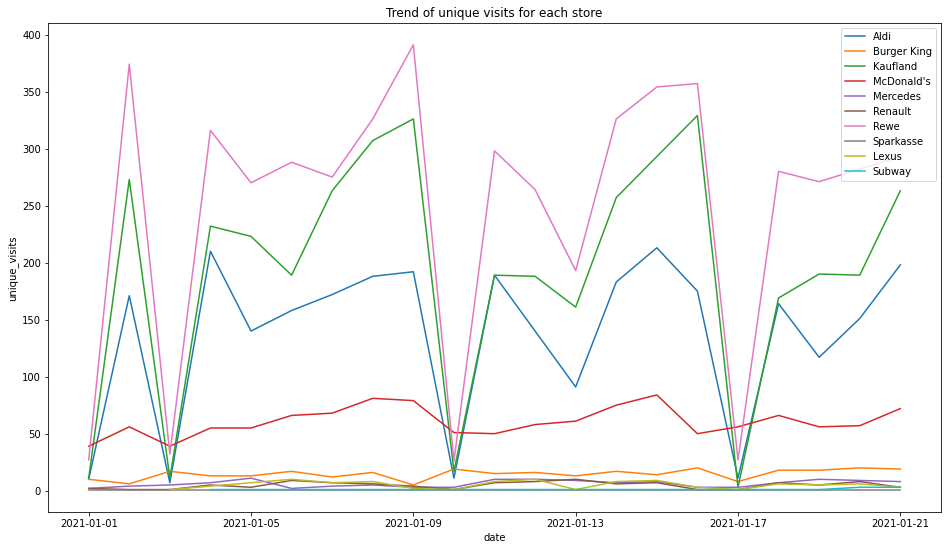

In [6]:
plt.figure(figsize=(16,9))

sns_plot = sns.lineplot(data=final_df,
                        x="date",
                        y="unique_visits",
                        hue="store_name",
                        estimator="sum", # the default is the "mean"
                        ci=None) # disable confidence intervals

plt.title("Trend of unique visits for each store")
plt.legend(loc="upper right");

Visualizing the unique visits for each store id caused a huge mess on the plot as there are 186 unique store ids, for this reason, I decided to plot the trend for each store name.

In [7]:
# save the plot
sns_plot.figure.savefig("../out_data_full/trend_of_unique_visits.png")

## 2.b Is there any anomaly? Add a comment about your observation

Most of the sores are closed on Sundays. If this is a representative sample of customers, I will go shopping on Tuesdays or Wednesdays from now on.

### Try to create a function for visualizing unique visits by store

In [8]:
final_df.head()

,date,store_name,store_id,total_signals,unique_visits,addidas,apple,bmw,employed,female,...,high_income,honda,job_seeking,low_income,male,mercedes-benz,middle_income,retired,student,tommy_helfinger
0,2021-01-01,Aldi,place_135,2,1,0,0,0,0,0,...,0,1,0,0,1,1,1,0,0,0
1,2021-01-01,Aldi,place_64,5,3,0,0,0,0,0,...,0,1,0,2,3,0,1,0,0,0
2,2021-01-01,Aldi,place_72,5,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,2021-01-01,Aldi,place_79,10,2,0,0,0,0,0,...,0,0,0,0,2,0,2,0,0,0
4,2021-01-01,Aldi,place_84,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [9]:
final_df["store_name"].unique()

array(['Aldi', 'Burger King', 'Kaufland', "McDonald's", 'Mercedes',
       'Renault', 'Rewe', 'Sparkasse', 'Lexus', 'Subway'], dtype=object)

In [10]:
def plot_a_store(name):
    s_name = name
    df = final_df.loc[final_df["store_name"] == s_name]
    plt.figure(figsize=(16,9))
    sns_plot = sns.lineplot(data=df,
                        x="date",
                        y="unique_visits",
                        estimator="sum",
                        hue=None,
                        ci=None)
    plt.title(f"Trend of unique visits for {s_name}")
    plt.show()

In [11]:
rewe_one_day = final_df.loc[(final_df["store_name"] == "Rewe") & (final_df["date"] == "2021-01-09")]

In [12]:
rewe_one_day["unique_visits"].sum()

391

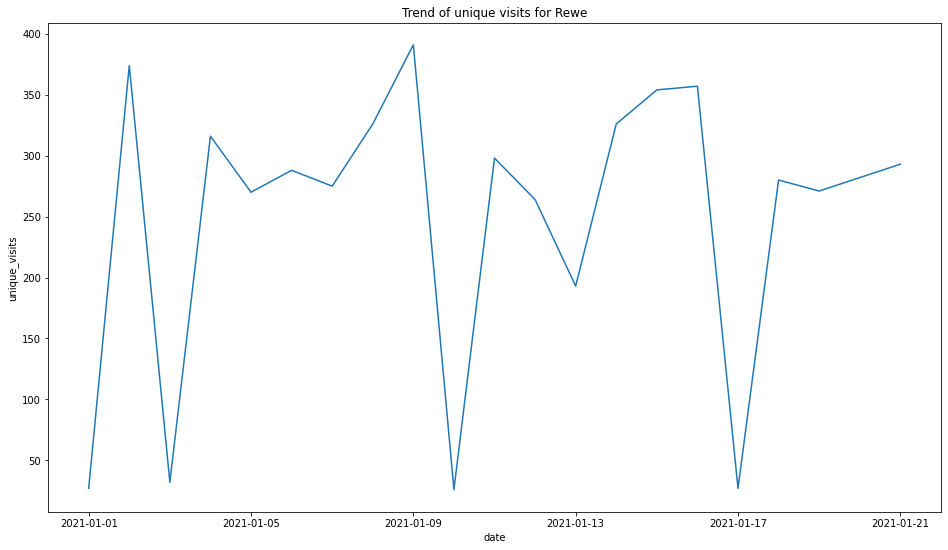

In [13]:
plot_a_store("Rewe")